# FE 595 Assignment 2

### Wanting Mao

### Find a smart-beta ETF and a benchmark ETF. Download the prices from Quandl. (With an Inception Date before 2015/01/01)

In [27]:
import quandl as qd
import pandas as pd
from pandas import DataFrame

qd.ApiConfig.api_key = 'e9mjr1zRrH1o_5zBfEEy'
data_RSP = qd.get('GOOG/NYSEARCA_RSP',start_date="2011-11-01", end_date="2016-08-31")
data_SPY = qd.get('GOOG/NYSE_SPY',start_date="2011-11-01", end_date="2016-08-31")

returns_RSP = (data_RSP.Close/data_RSP.Close.shift(1) - 1)*100
returns_SPY = (data_SPY.Close/data_SPY.Close.shift(1) - 1)*100
returns = DataFrame({'returns_RSP':returns_RSP,'returns_SPY':returns_SPY})


### Provide a short description about the smart ETF you select. Provide the reason why it might outperform the benchmark ETF.

Guggenheim S&P 500 Equal Weight ETF, formerly Rydex S&P 500 Equal Weight ETF, seeks to replicate as closely as possible, the daily performance of the S&P 500 Equal Weight Index (the Index). The Index is a capitalization-weighted index covering 500 industrial, utility, transportation and financial companies of the United States markets (mostly NYSE Euronext issues). The Index utilizes quarterly rebalancing to maintain its equal-weight stance. Under normal circumstances, the Fund will invest at least 90% of its net assets, plus any borrowing for investment purposes, in the equity securities (and derivatives thereof) included in the Index. The Fund invests in sectors, such as materials, telecommunication services, financials, consumer discretionary, information technology, industrials, healthcare, energy, consumer staples and utilities. Security Investors, LLC, which operates under the name Rydex Investments, serves as the investment adviser of the Fund.
RSP Equal weighting greatly increases the footprint of the midcaps stocks, which sometimes produces higher beta. Higher beta stands for higher risk, which means higher return. So the smart ETF might has better performance than the benchmark.

### Download Fame French data from Quandl.

In [28]:
data_FF = qd.get('KFRENCH/FACTORS_D',start_date="2011-11-01", end_date="2016-08-31")
data_FF = data_FF.rename(columns = {'Mkt-RF':'MKT_RF'})
data_FF = data_FF

### Create a time series DataFrame from the acquired data.

In [29]:
data = pd.concat([returns,data_FF], axis=1).dropna()
rRSP = data.returns_RSP - data.RF
rSPY = data.returns_SPY - data.RF
data['rRSP'] = rRSP
data['rSPY'] = rSPY
data

,returns_RSP,returns_SPY,MKT_RF,SMB,HML,RF,rRSP,rSPY
Date,,,,,,,,
2011-11-02,1.895944,1.564548,1.72,0.78,0.99,0.000,1.895944,1.564548
2011-11-03,1.990480,1.814662,1.97,0.61,-0.19,0.000,1.990480,1.814662
2011-11-04,-0.381841,-0.625792,-0.53,0.03,-0.59,0.000,-0.381841,-0.625792
2011-11-07,0.468484,0.661618,0.48,-0.70,0.40,0.000,0.468484,0.661618
2011-11-08,1.123357,1.251188,1.21,0.00,0.47,0.000,1.123357,1.251188
2011-11-09,-4.066233,-3.652432,-3.78,-0.81,-0.64,0.000,-4.066233,-3.652432
2011-11-10,0.852087,0.917282,0.83,0.05,0.58,0.000,0.852087,0.917282
2011-11-11,2.209705,1.850064,1.98,0.47,-0.23,0.000,2.209705,1.850064
2011-11-14,-0.911403,-0.916127,-0.92,-0.47,-0.79,0.000,-0.911403,-0.916127


### Analyze the daily returns of the ETF by Fama-French 3 Factor Model.

In [30]:
import statsmodels.formula.api as smf
mod = smf.ols(formula="rRSP ~ MKT_RF + SMB + HML", data=data).fit()
results = mod.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                   rRSP   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.533e+04
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:44:15   Log-Likelihood:                 617.63
No. Observations:                1214   AIC:                            -1227.
Df Residuals:                    1210   BIC:                            -1207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0063      0.004     -1.492      0.1

In [31]:
mod2 = smf.ols(formula="rSPY ~ MKT_RF + SMB + HML", data=data).fit()
results2 = mod2.summary()
print(results2)

                            OLS Regression Results                            
Dep. Variable:                   rSPY   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.285e+04
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:44:15   Log-Likelihood:                 1142.7
No. Observations:                1214   AIC:                            -2277.
Df Residuals:                    1210   BIC:                            -2257.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0079      0.003     -2.898      0.0

### Plot the rolling 1-year Fama-French alpha from 2016/01/01 to 2016/08/31 (the intercept parameter from the 3 factor model) use pandas plot function. Justify your explanation from Item 2.

In [32]:
rolling_data = data.loc['2015-01-01':'2016-08-31']

In [33]:
def regression(r):
    Intercept=[]
    for x in range(0,len(rolling_data.rSPY)-252):
        mod = smf.ols(formula="r[x:x+252] ~ rolling_data.MKT_RF[x:x+252] + \
        rolling_data.SMB[x:x+252]+ rolling_data.HML[x:x+252]", data=rolling_data[x:x+252]).fit().params.Intercept
        Intercept.append(mod)
    return Intercept
    
alpha_SPY = regression(rolling_data.rSPY)
alpha_RSP = regression(rolling_data.rRSP)

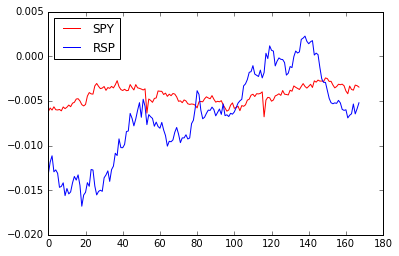

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(alpha_SPY,'r-',drawstyle='SPY',label='SPY')
plt.plot(alpha_RSP,'b-',drawstyle='RSP',label='RSP')
plt.legend(loc='best')

We can tell from the graph that, RSP has higher volatility than SPY(benchmark), which justifies that it has higher risk than the benchmark. However, higher risk means higher expected return, but it does not gaurenttee higher return in all the times.